In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/AI-DATA-CHALLENGE2



data  models  notebooks  reports


In [ ]:
from pathlib import Path
import pandas as pd

# Ruta base del proyecto en Drive
BASE_DIR = Path("/content/drive/MyDrive/AI-DATA-CHALLENGE2")
DATA_DIR   = BASE_DIR / "data"
MODELS_DIR = BASE_DIR / "models"
NOTEBOOKS  = BASE_DIR / "notebooks"
REPORTS    = BASE_DIR / "reports"

print("BASE_DIR:", BASE_DIR)

# Verifico que data existe y muestro archivos
print("Contenido de data/:")
!ls {DATA_DIR}



BASE_DIR: /content/drive/MyDrive/AI-DATA-CHALLENGE2
Contenido de data/:
challenge_data-18-ago.csv  processed.csv
Shape: (3563, 9)
                                                                                                                                                             title  \
0  "Real-world" data on the efficacy and safety of lenalidomide and dexamethasone in patients with relapsed/refractory multiple myeloma who were treated accord...   
1                                         22-oxacalcitriol suppresses secondary hyperparathyroidism without inducing low bone turnover in dogs with renal failure.   
2                                                                                                5 flourouracil-induced apical ballooning syndrome: a case report.   
3                                                                                              5-Fluorouracil cardiotoxicity induced by alpha-fluoro-beta-alanine.   
4                                       

In [ ]:
 # Librerías
import os
import json
import math
import itertools
from collections import Counter, defaultdict

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración de pandas
pd.set_option("display.max_colwidth", 160)
pd.set_option("display.max_rows", 100)

# Ruta base en Google Drive
BASE_DIR = Path("/content/drive/MyDrive/AI-DATA-CHALLENGE2")

# Rutas específicas
DATA_PATH = BASE_DIR / "data" / "challenge_data-18-ago.csv"
FIG_DIR = BASE_DIR / "reports" / "figures"

# Crear carpeta de figuras si no existe
os.makedirs(FIG_DIR, exist_ok=True)

# Verificar
print("DATA_PATH:", DATA_PATH)
print("FIG_DIR:", FIG_DIR)

# Versión de librerías
print('Pandas:', pd.__version__)
print('Numpy :', np.__version__)



DATA_PATH: /content/drive/MyDrive/AI-DATA-CHALLENGE2/data/challenge_data-18-ago.csv
FIG_DIR: /content/drive/MyDrive/AI-DATA-CHALLENGE2/reports/figures
Pandas: 2.2.2
Numpy : 2.0.2
Shape: (3565, 3)
                                                                              title  \
0  Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy.   
1                                 endoscopy reveals ventricular tachycardia secrets   
2                                       dementia and cholecystitis: organ interplay   
3  The interpeduncular nucleus regulates nicotine's effects on free-field activity.   
4                                      guillain-barre syndrome pathways in leukemia   

                                                                                                                                                          abstract  \
0  Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelinat

In [ ]:
from pathlib import Path
import pandas as pd

# Ruta base definida en setup
BASE_DIR = Path("/content/drive/MyDrive/AI-DATA-CHALLENGE2")
DATA_DIR = BASE_DIR / "data"

# Cargar el archivo con el que trabajaremos
df = pd.read_csv(DATA_DIR / "challenge_data-18-ago.csv", sep=";")

# Verificar columnas del dataset
assert set(['title','abstract','group']).issubset(df.columns), "Faltan columnas esperadas"

df.head()


,title,abstract,group
0,"Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy.",Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,"Research question: How does metformin affect cancer through pituitary adenoma mechanisms? Methods: randomized controlled study with 53 elderly patients, ass...",neurological
2,dementia and cholecystitis: organ interplay,"Purpose: This randomized controlled study examined statins for diabetes in adult population. The investigation included analysis of bun, cholelithiasis, and...",hepatorenal
3,The interpeduncular nucleus regulates nicotine's effects on free-field activity.,"Partial lesions were made with kainic acid in the interpeduncular nucleus of the ventral midbrain of the rat. Compared with sham-operated controls, lesions ...",neurological
4,guillain-barre syndrome pathways in leukemia,"Hypothesis: statins improves stroke outcomes via migraine pathways. Methods: cross-sectional trial with 285 adult population, measuring astrocytoma and pals...",neurological


In [ ]:
# Cargar CSV con delimitador ';'
df = pd.read_csv(DATA_PATH, sep=';')
assert set(['title','abstract','group']).issubset(df.columns), 'Columnas esperadas no presentes' #comprueba (con una “afirmación”) que en df sí existan las 3 columnas que necesitamos: title, abstract, group.

df.head(5)

,title,abstract,group
0,"Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy.",Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,"Research question: How does metformin affect cancer through pituitary adenoma mechanisms? Methods: randomized controlled study with 53 elderly patients, ass...",neurological
2,dementia and cholecystitis: organ interplay,"Purpose: This randomized controlled study examined statins for diabetes in adult population. The investigation included analysis of bun, cholelithiasis, and...",hepatorenal
3,The interpeduncular nucleus regulates nicotine's effects on free-field activity.,"Partial lesions were made with kainic acid in the interpeduncular nucleus of the ventral midbrain of the rat. Compared with sham-operated controls, lesions ...",neurological
4,guillain-barre syndrome pathways in leukemia,"Hypothesis: statins improves stroke outcomes via migraine pathways. Methods: cross-sectional trial with 285 adult population, measuring astrocytoma and pals...",neurological


In [ ]:
n_rows, n_cols = df.shape
info = {
    "num_rows": n_rows,
    "num_cols": n_cols,
    "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum().to_dict(),
    "duplicated_title": int(df['title'].duplicated().sum()),
    "duplicated_abstract": int(df['abstract'].duplicated().sum()),
}
info

{'num_rows': 3565,
 'num_cols': 3,
 'columns': ['title', 'abstract', 'group'],
 'missing_values': {'title': 0, 'abstract': 0, 'group': 0},
 'duplicated_title': 2,
 'duplicated_abstract': 0}

In [ ]:
# Hay 3,565 registros, cada registro tiene 3 columnas: title, abstract, group,
# pero hay 2 filas que aparecen como repetición de un título ya visto.
# NOTA: Puede ser:

#el mismo artículo repetido (mismo título y mismo abstract), o

#mismo título pero abstract diferente (dos estudios con igual título), o

#mismo título con grupos distintos.

In [ ]:
# Todas las filas cuyo título está duplicado (muestra ambas apariciones)
dups = df[df['title'].duplicated(keep=False)].sort_values('title')
dups[['title','abstract','group']]


,title,abstract,group
2246,Long term hormone therapy for perimenopausal and postmenopausal women.,BACKGROUND: Hormone therapy (HT) is widely used for controlling menopausal symptoms. It has also been used for the management and prevention of cardiovascul...,neurological|cardiovascular|oncological
2261,Long term hormone therapy for perimenopausal and postmenopausal women.,BACKGROUND: Hormone therapy (HT) is widely used for controlling menopausal symptoms and has also been used for the management and prevention of cardiovascul...,neurological|cardiovascular|oncological
1433,State-of-the-art thiazide diuretics for prostate cancer,"Research question: How does beta-blockers affect cancer through cholestasis mechanisms? Methods: prospective study with 369 cardiac patients, assessing rena...",hepatorenal
3096,State-of-the-art thiazide diuretics for prostate cancer,"Background: cancer affects diabetic patients worldwide, particularly involving arrhythmia and stenosis. Methods: We conducted a randomized controlled study ...",cardiovascular


In [ ]:
#. Aquí hay dos opciones, eliminar la fila duplicada o eliminar la fila duplicada y además fusionar los abstract
# con el mismo título, optaremos por la segunda para un dataset más prolijo

In [ ]:
# quita exactos
df_no_exact = df.drop_duplicates(subset=['title','abstract','group']).reset_index(drop=True)

# fusiona por título
tmp = df_no_exact.copy()
tmp['abs_len'] = tmp['abstract'].astype(str).str.split().str.len()

def merge_groups(series):
    joined = '|'.join(series)
    labs = sorted(set([x.strip() for x in joined.split('|') if x.strip()!='']))
    return '|'.join(labs)

df_merged = (tmp.sort_values(['title','abs_len'], ascending=[True, False])
               .groupby('title', as_index=False)
               .agg({'abstract':'first', 'group': merge_groups}))

# 3) reconstruye 'text'
df_clean = df_merged.copy()
df_clean['text'] = (df_clean['title'].fillna('') + ' ' + df_clean['abstract'].fillna('')).str.strip()
print(len(df), '->', len(df_clean), 'filas tras limpieza')
# Con este script:
# el par “Long term hormone therapy…” se reduce a 1 (porque era exacto).
# el par “State-of-the-art thiazide…” queda en 1 con el abstract más largo y etiquetas unidas.

3565 -> 3563 filas tras limpieza


In [ ]:
# Usar SIEMPRE el dataset limpio a partir de aquí
df = df_clean.copy()
print(len(df))  # verificar que es 3563


3563


In [ ]:
# Construir campo 'text' y longitudes (en tokens simples por espacios)
df['text'] = (df['title'].fillna('') + ' ' + df['abstract'].fillna('')).str.strip()
lengths = df['text'].astype(str).apply(lambda s: len(s.split()))

length_stats = {
    "avg_words": float(lengths.mean()),
    "std_words": float(lengths.std()),
    "p50_words": int(lengths.quantile(0.50)),
    "p90_words": int(lengths.quantile(0.90)),
    "p95_words": int(lengths.quantile(0.95)),
    "max_words": int(lengths.max()),
}
length_stats

{'avg_words': 108.72242492281785,
 'std_words': 96.51415235781592,
 'p50_words': 43,
 'p90_words': 261,
 'p95_words': 287,
 'max_words': 535}

In [ ]:
# avg_words = 108.7 → en promedio cada registro tiene ~109 palabras.
#p50_words = 43 → la mitad de los textos tiene ≤ 43 palabras.
#p90 = 261 y p95 = 287 → el 90–95% de los textos tiene ≤ ~260–287 palabras.
#max_words = 535 → el más largo tiene 535 palabras (pocos casos).
# podría funcionar con modelos como BERT.

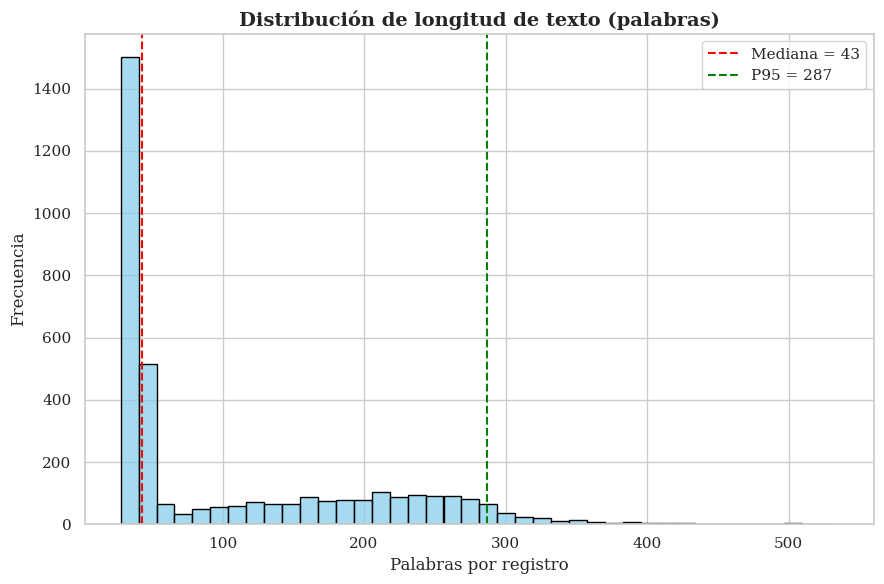

Guardado: ../reports/figures/length_histogram.png


In [ ]:
FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)
sns.set_theme(style="whitegrid", font="serif", palette="muted")

plt.figure(figsize=(9,6))
sns.histplot(lengths, bins=40, color="skyblue", edgecolor="black")

plt.title("Distribución de longitud de texto (palabras)", fontsize=14, weight="bold")
plt.xlabel("Palabras por registro", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.axvline(lengths.median(), color="red", linestyle="--", label=f"Mediana = {int(lengths.median())}")
plt.axvline(lengths.quantile(0.95), color="green", linestyle="--", label=f"P95 = {int(lengths.quantile(0.95))}")

plt.legend()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/length_histogram.png", dpi=200)
plt.show()

print("Guardado:", f"{FIG_DIR}/length_histogram.png")


In [ ]:
lengths = df['text'].astype(str).apply(lambda s: len(s.split()))

bins = [0, 50, 150, 300, np.inf]
bin_labels = ["0–50", "51–150", "151–300", ">300"]

df_len = df.copy()
df_len["len_words"] = lengths.values
df_len["len_bin"] = pd.cut(df_len["len_words"], bins=bins, labels=bin_labels, right=True, include_lowest=True)

df_len["labels_list"] = df_len["group"].astype(str).apply(lambda s: [t.strip() for t in s.split("|")])
classes = sorted({l for L in df_len["labels_list"] for l in L})

print("Bins:", bin_labels)
df_len[["len_words","len_bin"]].head()

Bins: ['0–50', '51–150', '151–300', '>300']


,len_words,len_bin
0,313,>300
1,387,>300
2,206,151–300
3,246,151–300
4,235,151–300


In [ ]:
# La mayoría de los textos son cortos: 0–50 palabras = 2011/3563 (~56%).

# Los muy largos son pocos: >300 palabras = 129 (~3.6%).

In [ ]:
from collections import Counter

def is_multilabel(L):
    return len(L) > 1

summary_by_bin = (
    df_len.groupby("len_bin")
          .agg(
              n_rows = ("len_words","size"),
              avg_len = ("len_words","mean"),
              p95_len = ("len_words", lambda x: np.quantile(x, 0.95)),
              multilabel_ratio = ("labels_list", lambda s: np.mean([is_multilabel(L) for L in s])),
              avg_labels_per_sample = ("labels_list", lambda s: np.mean([len(L) for L in s]))
          )
          .reset_index()
)

summary_by_bin["multilabel_ratio_%"] = (summary_by_bin["multilabel_ratio"]*100).round(1)
summary_by_bin.drop(columns=["multilabel_ratio"], inplace=True)
summary_by_bin


/tmp/ipython-input-1230128677.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_len.groupby("len_bin")


,len_bin,n_rows,avg_len,p95_len,avg_labels_per_sample,multilabel_ratio_%
0,0–50,2011,38.044754,44.0,1.291895,29.2
1,51–150,441,104.013605,146.0,1.285714,24.7
2,151–300,982,223.254582,287.0,1.408350,34.8
3,>300,129,354.759690,474.0,1.503876,41.9


In [ ]:
# matriz bin x clase con proporción de presencia de la clase en ese bin
rows = []
for b, g in df_len.groupby("len_bin"):
    total = len(g)
    counts = Counter([lab for L in g["labels_list"] for lab in L])
    row = {"len_bin": b}
    for c in classes:
        row[c] = counts.get(c, 0) / total if total > 0 else 0.0
    rows.append(row)

prev_by_bin = pd.DataFrame(rows).set_index("len_bin").loc[bin_labels]
prev_by_bin.round(3)


/tmp/ipython-input-3782701554.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for b, g in df_len.groupby("len_bin"):


,cardiovascular,hepatorenal,neurological,oncological
len_bin,,,,
0–50,0.421,0.323,0.402,0.146
51–150,0.306,0.288,0.546,0.145
151–300,0.254,0.288,0.646,0.221
>300,0.287,0.248,0.775,0.194


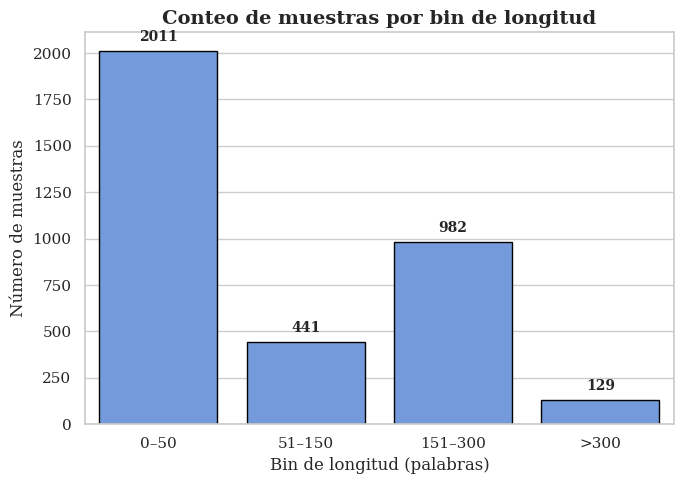

Guardado: ../reports/figures/count_by_bin.png


In [ ]:
sns.set_theme(style="whitegrid", font="serif", palette="muted")

plt.figure(figsize=(7,5))
ax = sns.barplot(
    x=summary_by_bin["len_bin"].astype(str),
    y=summary_by_bin["n_rows"],
    color="cornflowerblue",
    edgecolor="black"
)

plt.title("Conteo de muestras por bin de longitud", fontsize=14, weight="bold")
plt.xlabel("Bin de longitud (palabras)", fontsize=12)
plt.ylabel("Número de muestras", fontsize=12)

for i, v in enumerate(summary_by_bin["n_rows"]):
    ax.text(i, v + max(summary_by_bin["n_rows"])*0.02, str(v),
            ha="center", va="bottom", fontsize=10, weight="bold")

plt.tight_layout()
plt.savefig(f"{FIG_DIR}/count_by_bin.png", dpi=200)
plt.show()

print("Guardado:", f"{FIG_DIR}/count_by_bin.png")

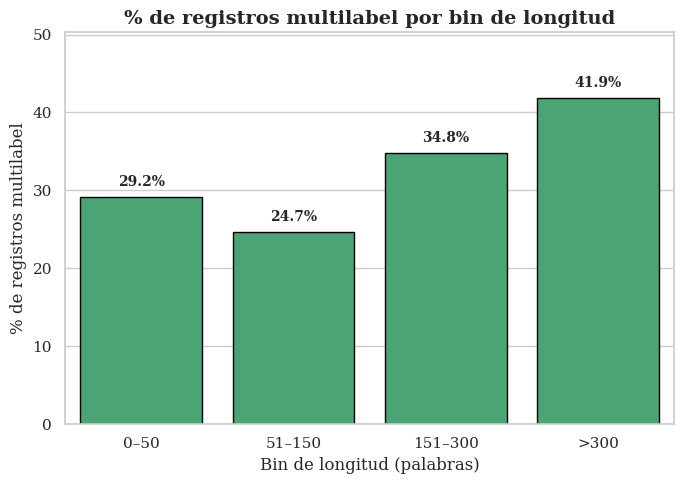

Guardado: ../reports/figures/multilabel_ratio_by_bin.png


In [ ]:
sns.set_theme(style="whitegrid", font="serif", palette="muted")

plt.figure(figsize=(7,5))
ax = sns.barplot(
    x=summary_by_bin["len_bin"].astype(str),
    y=summary_by_bin["multilabel_ratio_%"],
    color="mediumseagreen",
    edgecolor="black"
)

# títulos y etiquetas
plt.title("% de registros multilabel por bin de longitud", fontsize=14, weight="bold")
plt.xlabel("Bin de longitud (palabras)", fontsize=12)
plt.ylabel("% de registros multilabel", fontsize=12)

# anotaciones encima de las barras
for i, v in enumerate(summary_by_bin["multilabel_ratio_%"]):
    ax.text(i, v + 1, f"{v:.1f}%",
            ha="center", va="bottom", fontsize=10, weight="bold")

plt.ylim(0, max(summary_by_bin["multilabel_ratio_%"]) * 1.2)  # un poco de aire arriba
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/multilabel_ratio_by_bin.png", dpi=200)
plt.show()

print("Guardado:", f"{FIG_DIR}/multilabel_ratio_by_bin.png")


In [ ]:
# Los textos largos tienden a tener más de una etiqueta; conviene usar umbrales por clase (no uno global).

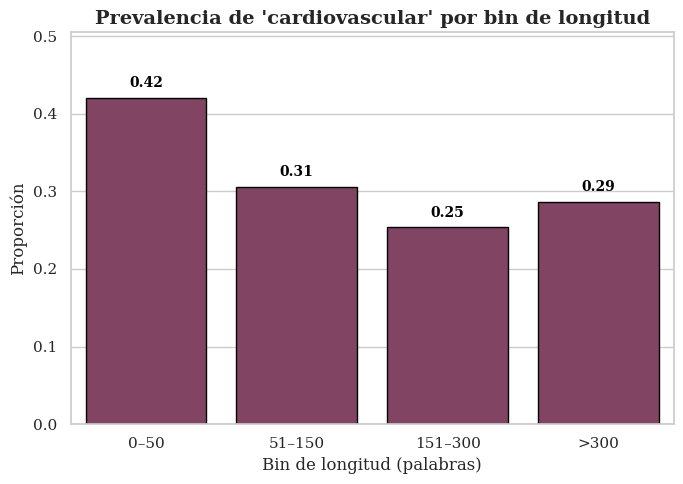

Guardado: ../reports/figures/prevalence_cardiovascular.png


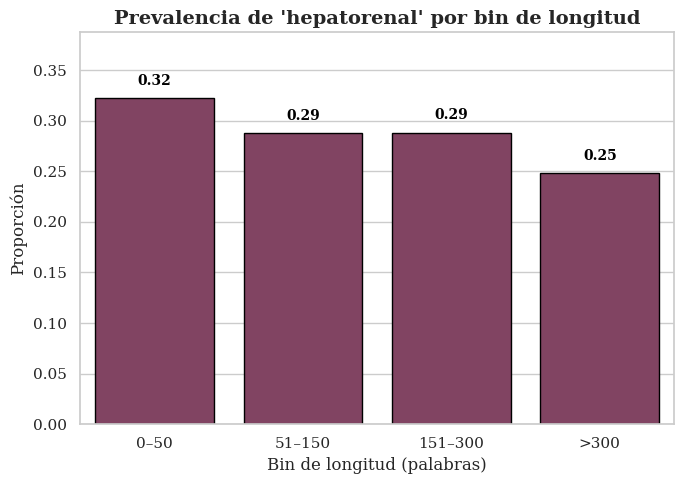

Guardado: ../reports/figures/prevalence_hepatorenal.png


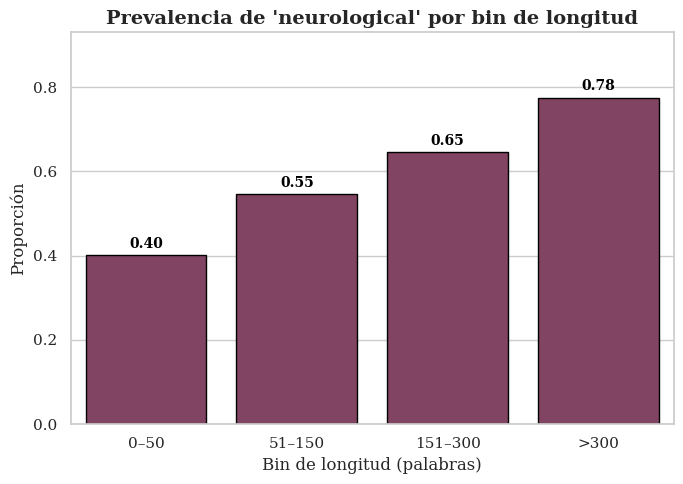

Guardado: ../reports/figures/prevalence_neurological.png


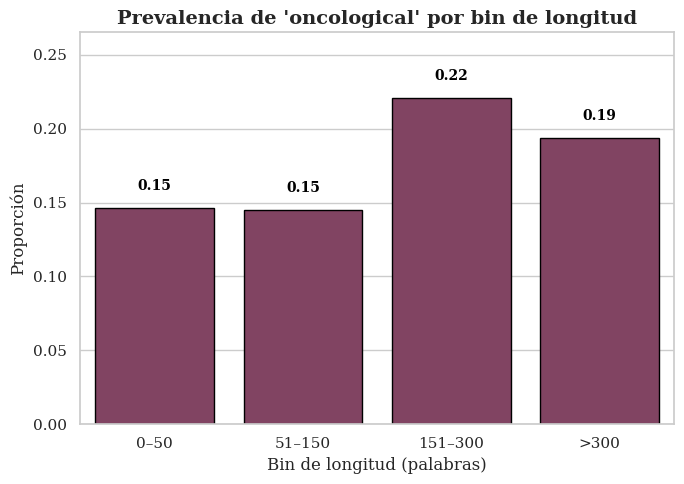

Guardado: ../reports/figures/prevalence_oncological.png


In [ ]:
sns.set_theme(style="whitegrid", font="serif", palette="muted")
wine_color = "#8B3A62"
edge = "black"

for c in classes:
    plt.figure(figsize=(7,5))
    ax = sns.barplot(
        x=prev_by_bin.index.astype(str),
        y=prev_by_bin[c].values,
        color=wine_color,
        edgecolor=edge
    )


    plt.title(f"Prevalencia de '{c}' por bin de longitud", fontsize=14, weight="bold")
    plt.xlabel("Bin de longitud (palabras)", fontsize=12)
    plt.ylabel("Proporción", fontsize=12)


    for i, v in enumerate(prev_by_bin[c].values):
        ax.text(i, v + 0.01, f"{v:.2f}",
                ha="center", va="bottom", fontsize=10, weight="bold", color=edge)

    plt.ylim(0, max(prev_by_bin[c].values)*1.2)  # un poco de aire arriba
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/prevalence_{c}.png", dpi=200)
    plt.show()

    print(f"Guardado: {FIG_DIR}/prevalence_{c}.png")

In [ ]:
# Hay correlación longitud↔clase (posible sesgo si los folds no lo reflejan)

In [ ]:

labels_series = df['group'].astype(str).apply(lambda x: [t.strip() for t in x.split('|')])
all_labels = [l for sub in labels_series for l in sub]
label_counts = Counter(all_labels)
classes = sorted(label_counts.keys())

# Estadísticas multilabel
avg_labels_per_sample = sum(len(x) for x in labels_series) / len(labels_series)
multi_label_ratio = sum(1 for x in labels_series if len(x) > 1) / len(labels_series)

summary_labels = {
    "classes": classes,
    "label_counts": dict(label_counts),
    "num_unique_labels": len(classes),
    "avg_labels_per_sample": round(avg_labels_per_sample, 3),
    "multi_label_ratio": round(multi_label_ratio, 3)
}
summary_labels

{'classes': ['cardiovascular', 'hepatorenal', 'neurological', 'oncological'],
 'label_counts': {'neurological': 1784,
  'hepatorenal': 1091,
  'cardiovascular': 1267,
  'oncological': 600},
 'num_unique_labels': 4,
 'avg_labels_per_sample': 1.331,
 'multi_label_ratio': 0.306}

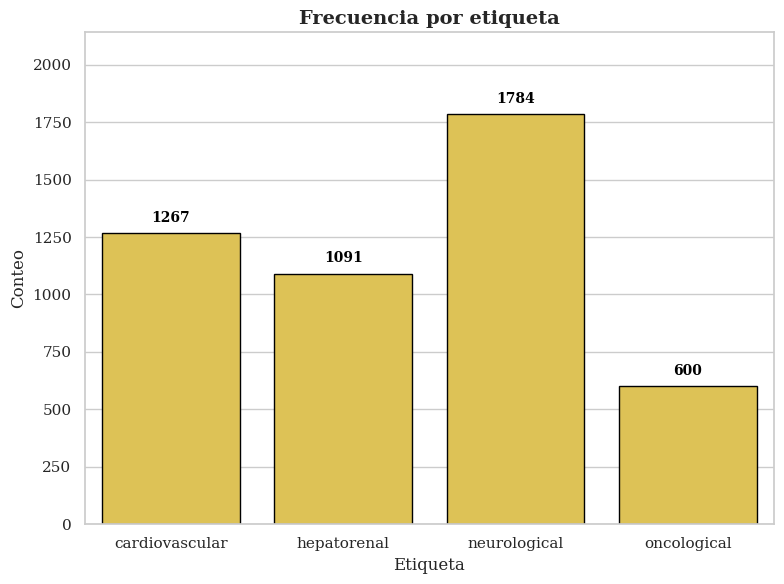

Guardado: ../reports/figures/label_distribution.png


In [ ]:
sns.set_theme(style="whitegrid", font="serif", palette="muted")

yellow_color = "#F4D03F"
edge = "black"

labels, counts = zip(*sorted(label_counts.items(), key=lambda x: x[0]))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=list(labels),
    y=list(counts),
    color=yellow_color,
    edgecolor=edge
)

plt.title("Frecuencia por etiqueta", fontsize=14, weight="bold")
plt.xlabel("Etiqueta", fontsize=12)
plt.ylabel("Conteo", fontsize=12)

for i, v in enumerate(counts):
    ax.text(i, v + max(counts)*0.02, str(v),
            ha="center", va="bottom", fontsize=10, weight="bold", color=edge)

plt.ylim(0, max(counts)*1.2)
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/label_distribution.png", dpi=200)
plt.show()

print("Guardado:", f"{FIG_DIR}/label_distribution.png")

In [ ]:
# Matriz de co-ocurrencia (conteos)
cls_idx = {c:i for i,c in enumerate(classes)}
cooc = np.zeros((len(classes), len(classes)), dtype=int)

for labs in labels_series:
    idxs = [cls_idx[l] for l in labs if l in cls_idx]
    for i in idxs:
        for j in idxs:
            if i <= j:
                cooc[i,j] += 1
                if i != j:
                    cooc[j,i] += 1

cooc_df = pd.DataFrame(cooc, index=classes, columns=classes)
cooc_df

,cardiovascular,hepatorenal,neurological,oncological
cardiovascular,1267,233,355,96
hepatorenal,233,1091,263,138
neurological,355,263,1784,188
oncological,96,138,188,600


Matriz normalizada (proporciones por fila):


,cardiovascular,hepatorenal,neurological,oncological
cardiovascular,0.649,0.119,0.182,0.049
hepatorenal,0.135,0.632,0.152,0.080
neurological,0.137,0.102,0.689,0.073
oncological,0.094,0.135,0.184,0.587


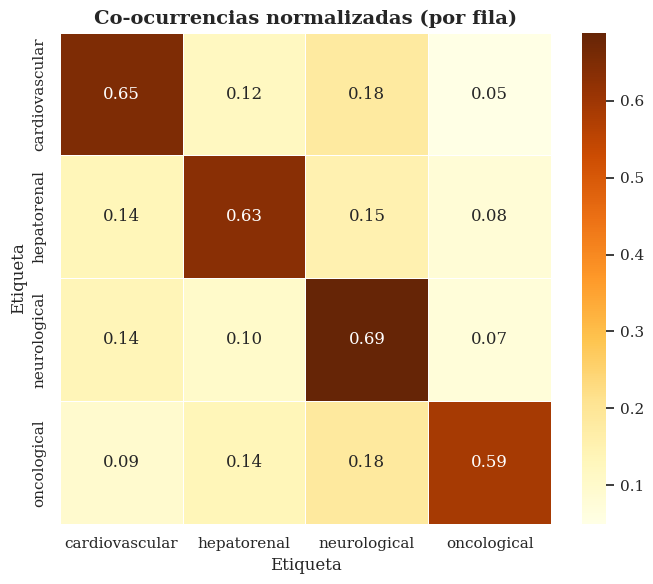

Guardado: ../reports/figures/label_cooccurrence_normalized.png


In [ ]:
# Normalización por fila
cooc_norm = cooc_df.div(cooc_df.sum(axis=1), axis=0).round(3)

print("Matriz normalizada (proporciones por fila):")
display(cooc_norm)

plt.figure(figsize=(7,6))
ax = sns.heatmap(
    cooc_norm,
    annot=True, fmt=".2f",
    cmap="YlOrBr",
    cbar=True,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Co-ocurrencias normalizadas (por fila)", fontsize=14, weight="bold")
plt.xlabel("Etiqueta", fontsize=12)
plt.ylabel("Etiqueta", fontsize=12)

plt.tight_layout()
plt.savefig(f"{FIG_DIR}/label_cooccurrence_normalized.png", dpi=200)
plt.show()

print("Guardado:", f"{FIG_DIR}/label_cooccurrence_normalized.png")



In [ ]:
# El dataset no es multiclase puro: ~30–40% de los ejemplos tienen 2 etiquetas.
# Esto refuerza que el modelo debe manejar multilabel real
#  y que las dependencias entre etiquetas son útiles (ej. usar modelos que capturen correlaciones entre salidas).

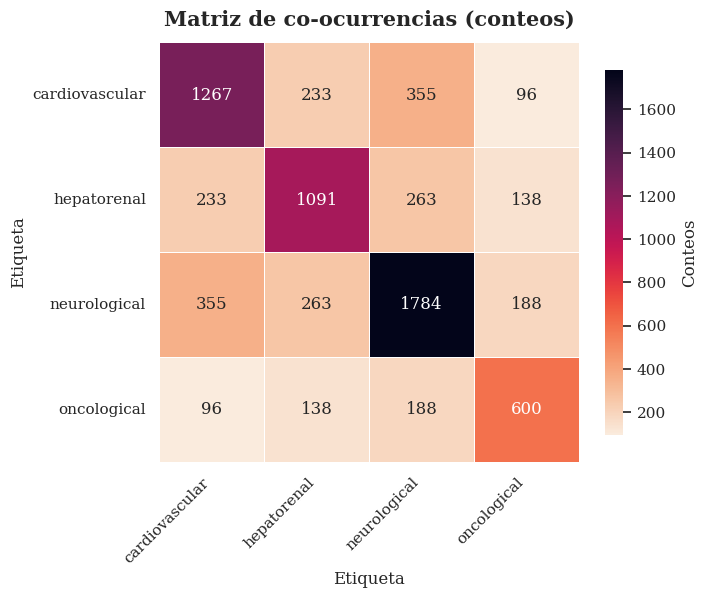

Guardado: ../reports/figures/label_cooccurrence.png


In [ ]:
# Mapa de co-ocurrencia
sns.set_theme(style="white", font="serif")

cmap = sns.color_palette("rocket_r", as_cmap=True)

plt.figure(figsize=(7.2, 6.2))
ax = sns.heatmap(
    cooc_df,
    annot=True,           # muestra los conteos
    fmt="d",
    cmap=cmap,
    cbar=True,
    cbar_kws={"shrink": .8, "label": "Conteos"},
    linewidths=0.5,       # líneas divisorias finas
    linecolor="white",
    square=True           # celdas cuadradas
)


ax.set_title("Matriz de co-ocurrencias (conteos)", fontsize=15, weight="bold", pad=12)
ax.set_xlabel("Etiqueta", fontsize=12)
ax.set_ylabel("Etiqueta", fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(f"{FIG_DIR}/label_cooccurrence.png", dpi=220)
plt.show()

print("Guardado:", f"{FIG_DIR}/label_cooccurrence.png")

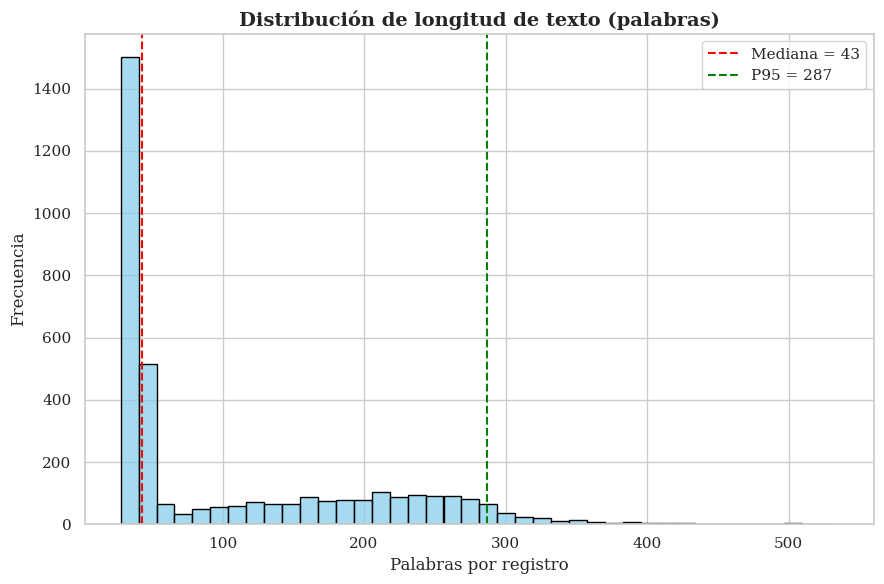

Guardado: ../reports/figures/length_histogram.png


In [ ]:
FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)
sns.set_theme(style="whitegrid", font="serif", palette="muted")

plt.figure(figsize=(9,6))
sns.histplot(lengths, bins=40, color="skyblue", edgecolor="black")

plt.title("Distribución de longitud de texto (palabras)", fontsize=14, weight="bold")
plt.xlabel("Palabras por registro", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.axvline(lengths.median(), color="red", linestyle="--", label=f"Mediana = {int(lengths.median())}")
plt.axvline(lengths.quantile(0.95), color="green", linestyle="--", label=f"P95 = {int(lengths.quantile(0.95))}")

plt.legend()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/length_histogram.png", dpi=200)
plt.show()

print("Guardado:", f"{FIG_DIR}/length_histogram.png")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Usamos el campo 'text' ya limpio
texts = df['text']
labels_series = df['group'].astype(str).apply(lambda x: [t.strip() for t in x.split('|')])

# Vectorizador TF-IDF (unigramas y bigramas)
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)
X_tfidf = tfidf.fit_transform(texts)
feature_names = np.array(tfidf.get_feature_names_out())

# Función: top términos por clase
def top_terms_for_class(class_name, top_n=10):
    # índices de textos que contienen esa clase
    idx = [i for i, labs in enumerate(labels_series) if class_name in labs]
    if not idx:
        return pd.DataFrame(columns=["term","score"])

    # submatriz
    X_sub = X_tfidf[idx].mean(axis=0).A1
    top_idx = np.argsort(X_sub)[::-1][:top_n]
    return pd.DataFrame({
        "term": feature_names[top_idx],
        "score": X_sub[top_idx].round(3)
    })

# Ejemplo: top 10 palabras por cada clase
for c in classes:
    print(f"\nTop términos para clase '{c}':")
    display(top_terms_for_class(c, top_n=10))



Top términos para clase 'cardiovascular':


,term,score
0,patients,0.042
1,cardiac,0.036
2,heart,0.036
3,results,0.033
4,methods,0.032
5,conclusion,0.031
6,disease,0.031
7,vascular insights,0.030
8,vascular,0.030
9,cancer,0.029



Top términos para clase 'hepatorenal':


,term,score
0,patients,0.040
1,renal,0.035
2,methods,0.030
3,results,0.030
4,conclusion,0.028
5,cancer,0.027
6,disease,0.026
7,liver,0.026
8,organ,0.026
9,study,0.024



Top términos para clase 'neurological':


,term,score
0,patients,0.037
1,results,0.024
2,disease,0.024
3,methods,0.023
4,cancer,0.023
5,study,0.022
6,conclusion,0.021
7,brain,0.020
8,pathways,0.018
9,induced,0.017



Top términos para clase 'oncological':


,term,score
0,cancer,0.084
1,patients,0.040
2,brca1,0.033
3,mutations,0.029
4,breast,0.028
5,tumor,0.026
6,results,0.025
7,methods,0.025
8,conclusion,0.022
9,ovarian,0.022


In [ ]:
from pathlib import Path

BASE_DIR = Path("/content/drive/MyDrive/AI-DATA-CHALLENGE2")
DATA_DIR = BASE_DIR / "data"

DATA_DIR.mkdir(parents=True, exist_ok=True)

# Guardar archivo
out_path = DATA_DIR / "processed_clean.csv"
df_clean.to_csv(out_path, index=False)
print("Guardado:", out_path)


Guardado: /content/drive/MyDrive/AI-DATA-CHALLENGE2/data/processed_clean.csv
